In [1]:
path = "/Users/Altay.Sansal/Downloads/SEGY/Teapot Dome/filt_mig_nopad_tgsbytes.sgy"
path_gcs = "gs://tgs-datascience-zarr-experiments/segy/filt_mig_nopad_tgsbytes.sgy"

# path = "/Users/Altay.Sansal/Downloads/SEGY/TGS DM Test Files/5393_357__PRCMIG.segy"
# path = "/Users/Altay.Sansal/Downloads/SEGY/TGS Malvinas/Seq_127_navmerge_shot_5000_6000_sorted.segy"
# path = "/Users/Altay.Sansal/Downloads/SEGY/TGS DM Shots/2655_NAVMERGE.5750.P3B.0066.LIBRARY.segy"
# path = "/Users/Altay.Sansal/Downloads/SEGY/TGS Campos/postsrme_2km_sorted_gathers_Line_1000.segy"

In [2]:
# from segy_ninja.schema.header import TraceHeaderDescriptor, HeaderFieldDescriptor, BinaryHeaderDescriptor
# from segy_ninja.standards.rev1 import open_rev1
# 
# 
# custom_binary_hdr = BinaryHeaderDescriptor(
#     item_size=400,
#     offset=3200,
#     fields=[
#         HeaderFieldDescriptor(name="sample_interval", offset=16, format="int16"),
#         HeaderFieldDescriptor(name="samples_per_trace", offset=20, format="int16"),
#     ]
# )
# 
# custom_trace_hdr = TraceHeaderDescriptor(
#     item_size=240,
#     fields=[
#         HeaderFieldDescriptor(name="ffid_orig", offset=8, format="int32"),
#         HeaderFieldDescriptor(name="trc_type", offset=28, format="int16"),
#         HeaderFieldDescriptor(name="water_velocity", offset=90, format="int16"),
#         HeaderFieldDescriptor(name="seq", offset=128, format="int16"),
#         HeaderFieldDescriptor(name="sailline", offset=132, format="int16"),
#         HeaderFieldDescriptor(name="navgun", offset=134, format="int16"),
#         HeaderFieldDescriptor(name="cable", offset=136, format="int16"),
#         HeaderFieldDescriptor(name="cmpline", offset=138, format="int16"),
#         HeaderFieldDescriptor(name="wb_time", offset=204, format="int32"),
#         HeaderFieldDescriptor(name="tide_height", offset=208, format="int32"),
#         HeaderFieldDescriptor(name="inline", offset=212, format="int32"),
#         HeaderFieldDescriptor(name="crossline", offset=216, format="int32"),
#         HeaderFieldDescriptor(name="gps_shot_time", offset=224, format="int64"),
#         HeaderFieldDescriptor(name="gap", offset=232, format="int64")
#     ]
# )
# 
# 
# 
# sgy = open_rev1(
#     path,
#     binary_file_header=custom_binary_hdr,
#     trace_header_descriptor=custom_trace_hdr,
# )

In [3]:
from segy_ninja.schema.segy import SegyDescriptor
import os

prefix, ext = os.path.splitext(path)
path_json = ".".join([prefix, "json"])
with open(path_json, mode="r") as fp:
    sgy = SegyDescriptor.model_validate_json(fp.read())

In [4]:
import fsspec
try:
    path = path_gcs
except NameError:
    pass

with fsspec.open(path, mode="rb") as fp:
    text_hdr = sgy.text_file_header.read(fp)
    bin_hdr = sgy.binary_file_header.read(fp)
    trcs = sgy.traces.read(fp, 1_000)

print(text_hdr)
print(path)

C 1 CLIENT: ROCKY MOUNTAIN OILFIELD TESTING CENTER                              
C 2 PROJECT: NAVAL PETROLEUM RESERVE #3 (TEAPOT DOME); NATRONA COUNTY, WYOMING  
C 3 LINE: 3D                                                                    
C 4                                                                             
C 5 THIS IS THE FILTERED POST STACK MIGRATION                                   
C 6                                                                             
C 7 INLINE 1, XLINE 1:   X COORDINATE: 788937  Y COORDINATE: 938845             
C 8 INLINE 1, XLINE 188: X COORDINATE: 809501  Y COORDINATE: 939333             
C 9 INLINE 188, XLINE 1: X COORDINATE: 788039  Y COORDINATE: 976674             
C10 INLINE NUMBER:    MIN: 1  MAX: 345  TOTAL: 345                              
C11 CROSSLINE NUMBER: MIN: 1  MAX: 188  TOTAL: 188                              
C12 TOTAL NUMBER OF CDPS: 64860   BIN DIMENSION: 110' X 110'                    
C13                         

In [5]:
import pandas as pd
df = pd.DataFrame(bin_hdr, copy=False)
df

,sample_interval,samples_per_trace
0,2000,1501


In [6]:
df = pd.DataFrame(trcs["header"], copy=False)
df

,inline,crossline,cdp-x,cdp-y
0,1,153,8056526,9392424
1,1,154,8057625,9392450
2,1,155,8058725,9392476
3,1,156,8059825,9392502
4,1,157,8060925,9392528
...,...,...,...,...
995,29,170,8074490,9423659
996,29,171,8075589,9423685
997,29,172,8076689,9423711
998,29,173,8077788,9423737


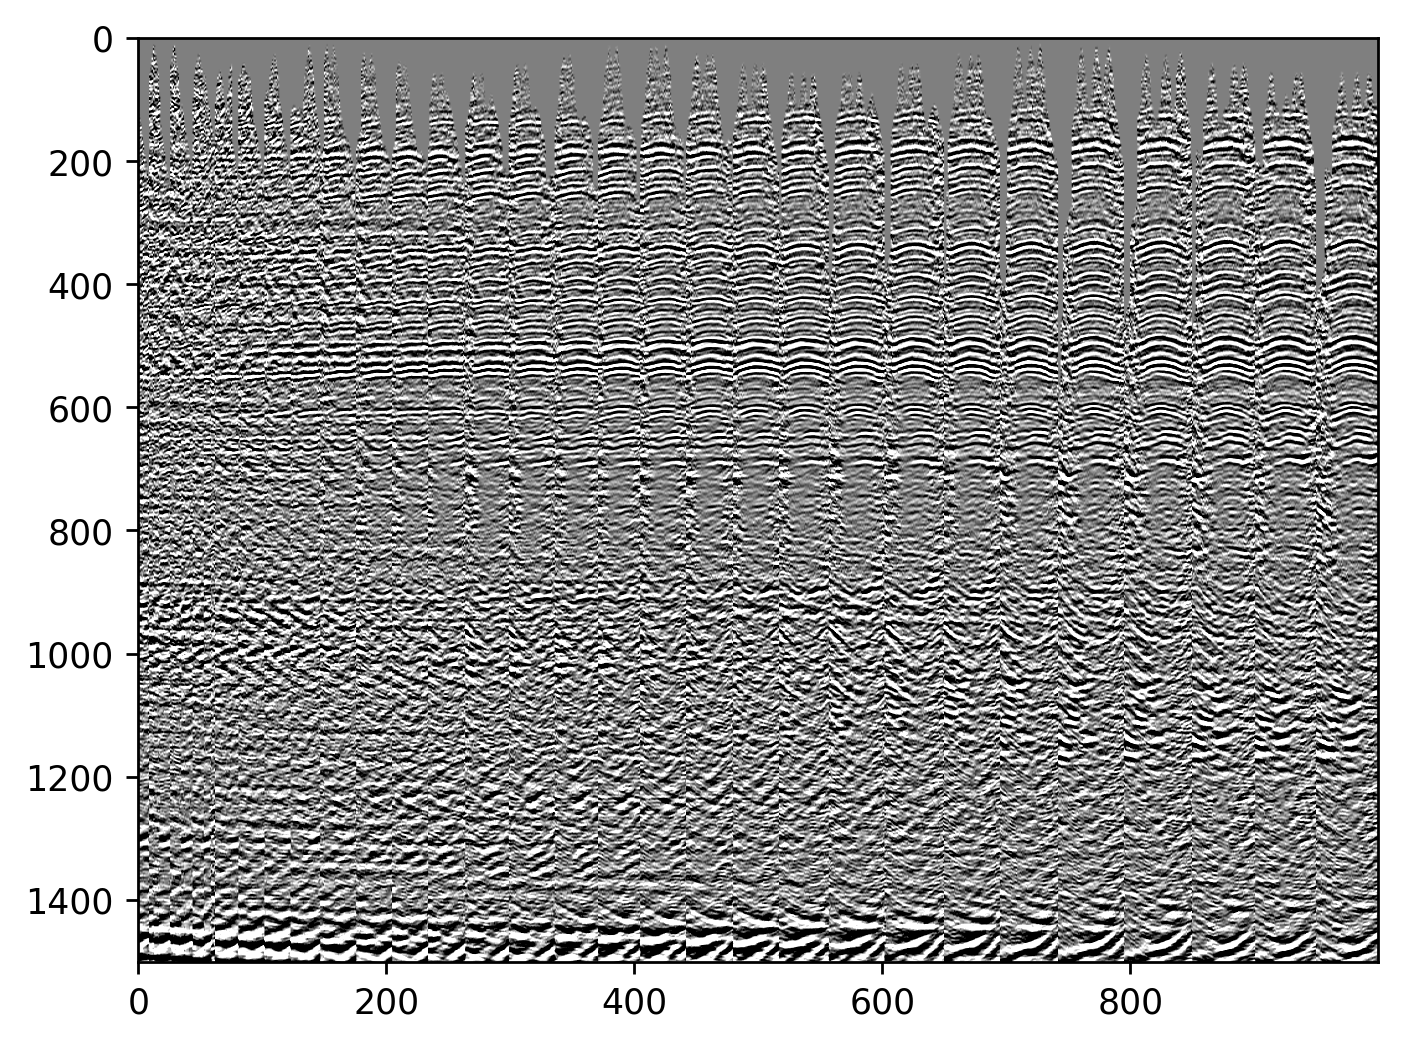

In [7]:
import matplotlib.pyplot as plt

plt.figure(dpi=250)
plt.imshow(trcs["data"].T, aspect="auto", vmin=-1, vmax=1, cmap="gray_r")

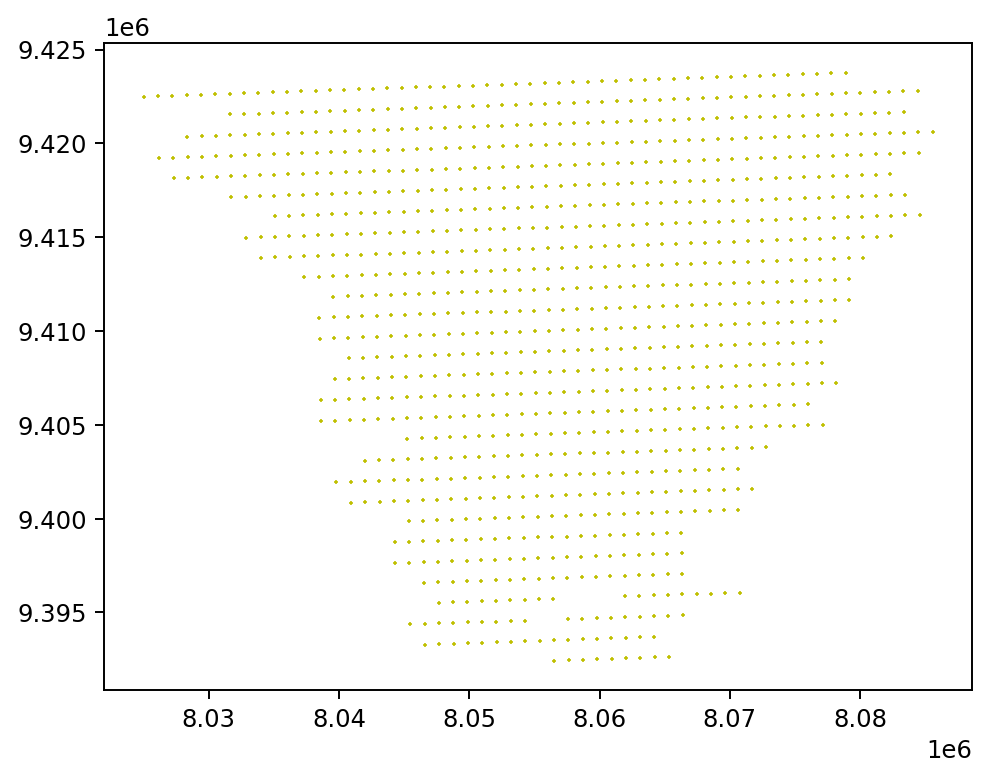

In [8]:
plt.figure(dpi=175)
plt.scatter(df["cdp-x"], df["cdp-y"], s=1, marker="+", c="y")
# plt.scatter(df["inline"], df["crossline"], s=1, marker="*", c="r")
